<a href="https://colab.research.google.com/github/ilhamyorinda/MetodeClustering_DataLulus_eLearning/blob/main/Thesis_Ilham_Yorinda_10_Juli_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics

# K-Medoids Mitigasi

In [ ]:
Data= pd.read_excel(r'C:\Users\DELL\Documents\Personal\educativa\Project 2849\Rev 0\Data.xlsx')
#Data=Data[["Kollektibility","Tersedianya_Cadangan","Menerima_Keringanan","Bidang_Usaha","Lokasi_Usaha"]]

In [ ]:
condition1 = Data["Kollektibility"] == 1
condition2 = Data["Kollektibility"] == 2
condition3 = Data["Kollektibility"] == 3
condition4 = Data["Kollektibility"] == 4
Data_mitigasi=Data[condition1 | condition2 | condition3 | condition4]

In [ ]:
Data_mitigasi
Data_mitigasi=Data_mitigasi[["Kollektibility","Menerima_Keringanan", "Tersedianya_Cadangan"]]
Data_mitigasi

,Kollektibility,Menerima_Keringanan,Tersedianya_Cadangan
10,1,0,2
11,1,0,2
12,1,0,2
13,1,0,2
14,1,0,2
...,...,...,...
4289,3,1,0
4381,1,1,2
4451,1,1,2
4823,1,1,2


In [ ]:
K = range(2,10)
wss = []
for k in K:
    kmedoids=KMedoids(n_clusters=k, random_state=0,method="pam").fit(Data_mitigasi)
    wss_iter = kmedoids.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,2,30.307136
1,3,13.064495
2,4,10.000000
3,5,7.000000
4,6,5.000000
5,7,3.000000
6,8,1.000000
7,9,0.000000


[Text(0.5, 1.0, 'Elbow Method Analisis Cluster Mitigasi Risiko')]

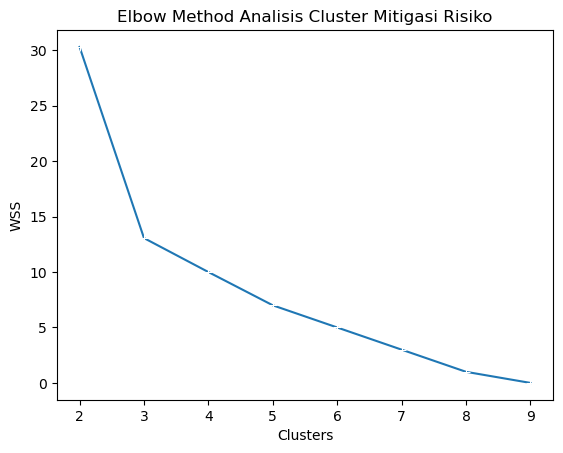

In [ ]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+").set(title='Elbow Method Analisis Cluster Mitigasi Risiko')

In [ ]:
model_mitigasi=KMedoids(n_clusters=3,random_state=0,method="pam").fit(Data_mitigasi)
Center_mitigasi=model_mitigasi.cluster_centers_
Center_mitigasi=pd.DataFrame(Center_mitigasi,columns=["Kollektibility","Menerima_Keringanan", "Tersedianya_Cadangan"])
Center_mitigasi

,Kollektibility,Menerima_Keringanan,Tersedianya_Cadangan
0,4,1,2
1,1,1,2
2,1,0,2


In [ ]:
SK = range(2,6)
sil_score = []
for i in SK:
    labels=KMedoids(n_clusters=i,random_state=0,method="pam").fit(Data_mitigasi).labels_
    score = metrics.silhouette_score(Data_mitigasi,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(Data_mitigasi,labels,metric="euclidean",sample_size=1000,random_state=200)))

sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Silhouette score for k(clusters) = 2 is 0.7337602805858038
Silhouette score for k(clusters) = 3 is 0.7943244576108068
Silhouette score for k(clusters) = 4 is 0.7870159542852496
Silhouette score for k(clusters) = 5 is 0.856077362180059


,Clusters,Sil Score
0,2,0.733760
1,3,0.794324
2,4,0.787016
3,5,0.856077


In [ ]:
Anggota_mitigasi=model_mitigasi.labels_
Anggota_mitigasi=pd.DataFrame(Anggota_mitigasi+1, columns=["Anggota"])

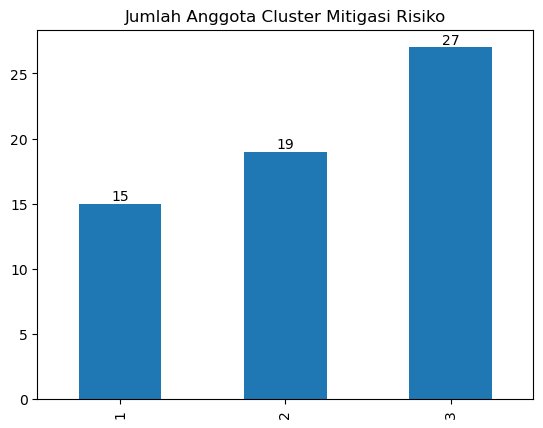

In [ ]:
plt.figure()
fig=Anggota_mitigasi['Anggota'].value_counts().sort_index().plot(kind='bar')
#Anggota_kmedoids['Anggota'].value_counts()
plt.bar_label(fig.containers[0], label_type='edge')
plt.title('Jumlah Anggota Cluster Mitigasi Risiko')
plt.show()

# KMedoids Ekspansi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics

In [ ]:
Data= pd.read_excel(r'C:\Users\DELL\Documents\Personal\educativa\Project 2849\Rev 0\Data.xlsx')
Data_ekspansi=Data[Data["Kollektibility"] == 0]
Data_ekspansi=Data_ekspansi[["Kollektibility","Tersedianya_Cadangan","Menerima_Keringanan"]]
Data_ekspansi=Data_ekspansi.reset_index(drop=True)
Data_ekspansi

,Kollektibility,Tersedianya_Cadangan,Menerima_Keringanan
0,0,0,1
1,0,2,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
5022,0,0,0
5023,0,0,0
5024,0,1,0
5025,0,1,0


In [ ]:
K = range(2,10)
wss = []
for k in K:
    kmedoids=KMedoids(n_clusters=k, random_state=0,method="pam").fit(Data_ekspansi)
    wss_iter = kmedoids.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,2,1482.002092
1,3,937.000000
2,4,516.000000
3,5,169.000000
4,6,0.000000
5,7,0.000000
6,8,0.000000
7,9,0.000000


[Text(0.5, 1.0, 'Elbow Method Analisis Cluster Ekspansi Bisnis')]

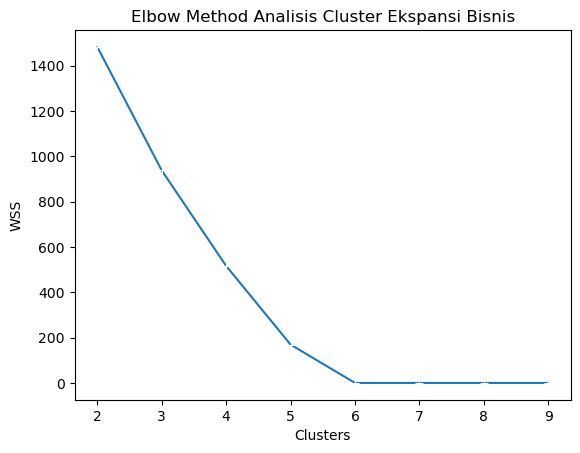

In [ ]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+").set(title='Elbow Method Analisis Cluster Ekspansi Bisnis')

In [ ]:
SK = range(2,7)
sil_score = []
for i in SK:
    labels=KMedoids(n_clusters=i,random_state=0,method="pam").fit(Data_ekspansi).labels_
    score = metrics.silhouette_score(Data_ekspansi,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(Data_ekspansi,labels,metric="euclidean",sample_size=1000,random_state=200)))

sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Silhouette score for k(clusters) = 2 is 0.7085431169453845
Silhouette score for k(clusters) = 3 is 0.7887209394877409
Silhouette score for k(clusters) = 4 is 0.8832457581597882
Silhouette score for k(clusters) = 5 is 0.9552835820895523
Silhouette score for k(clusters) = 6 is 1.0


,Clusters,Sil Score
0,2,0.708543
1,3,0.788721
2,4,0.883246
3,5,0.955284
4,6,1.000000


In [ ]:
model_ekspansi=KMedoids(n_clusters=5,random_state=0,method="pam").fit(Data_ekspansi)
Center_ekspansi=model_ekspansi.cluster_centers_
Center_ekspansi=pd.DataFrame(Center_ekspansi,columns=["Kollektibility","Tersedianya_Cadangan","Menerima_Keringanan"])
Center_ekspansi

,Kollektibility,Tersedianya_Cadangan,Menerima_Keringanan
0,0,1,0
1,0,1,1
2,0,0,1
3,0,2,0
4,0,0,0


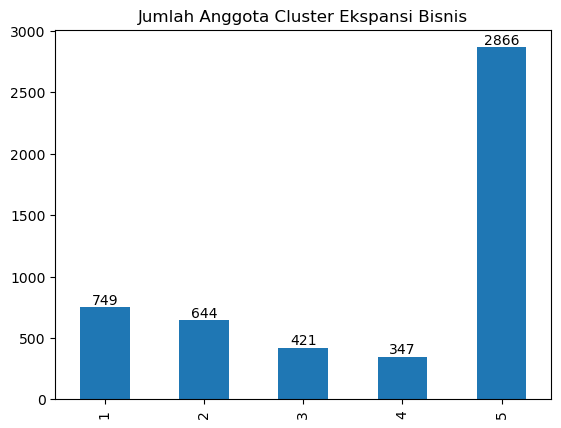

In [ ]:
Anggota_ekspansi=model_ekspansi.labels_
Anggota_ekspansi=pd.DataFrame(Anggota_ekspansi+1, columns=["Anggota"])
plt.figure()
fig=Anggota_ekspansi['Anggota'].value_counts().sort_index().plot(kind='bar')
plt.bar_label(fig.containers[0], label_type='edge')
plt.title('Jumlah Anggota Cluster Ekspansi Bisnis')
plt.show()

In [ ]:
Data= pd.read_excel(r'C:\Users\DELL\Documents\Personal\educativa\Project 2849\Rev 0\Data.xlsx')
Data_ekspansi=Data[Data["Kollektibility"] == 0]
Data_ekspansi=Data_ekspansi.reset_index(drop=True)
Data_ekspansi["Anggota"]=Anggota_ekspansi
Data_ekspansi

,Bidang_Usaha,Jenis_Kredit,Lama_Kredit,Peruntukan_Kredit,Tersedianya_Cadangan,Lokasi_Usaha,Jenis_Usaha,Kollektibility,Menerima_Keringanan,Anggota
0,4,1,4,1,0,3,2,0,1,3
1,4,1,4,1,2,4,2,0,1,2
2,5,2,1,1,0,4,2,0,0,5
3,5,2,1,1,0,4,2,0,0,5
4,5,2,1,1,0,6,2,0,0,5
...,...,...,...,...,...,...,...,...,...,...
5022,4,2,1,1,0,0,2,0,0,5
5023,4,2,1,1,0,4,2,0,0,5
5024,4,2,1,1,1,1,2,0,0,1
5025,2,2,1,1,1,1,2,0,0,1


# Analisis profil klaster ekspansi bisnis

In [ ]:
Data= pd.read_excel(r'C:\Users\DELL\Documents\Personal\educativa\Project 2849\Rev 0\Data.xlsx')
Data_ekspansi=Data[Data["Kollektibility"] == 0]
Data_ekspansi=Data_ekspansi.reset_index(drop=True)
Data_ekspansi = Data_ekspansi.astype(str)
categorical_columns = Data_ekspansi.select_dtypes(include=['object', 'category']).columns
Data_ekspansi["Anggota"]=Anggota_ekspansi
Data_ekspansi
Kelompok_1=Data_ekspansi[Data_ekspansi["Anggota"] == 1]
Kelompok_2=Data_ekspansi[Data_ekspansi["Anggota"] == 2]
Kelompok_3=Data_ekspansi[Data_ekspansi["Anggota"] == 3]
Kelompok_4=Data_ekspansi[Data_ekspansi["Anggota"] == 4]
Kelompok_5=Data_ekspansi[Data_ekspansi["Anggota"] == 5]

Bidang_Usaha
4    1688
2    1688
5     734
1     518
0     165
6     160
3      74
Name: Bidang_Usaha, dtype: int64


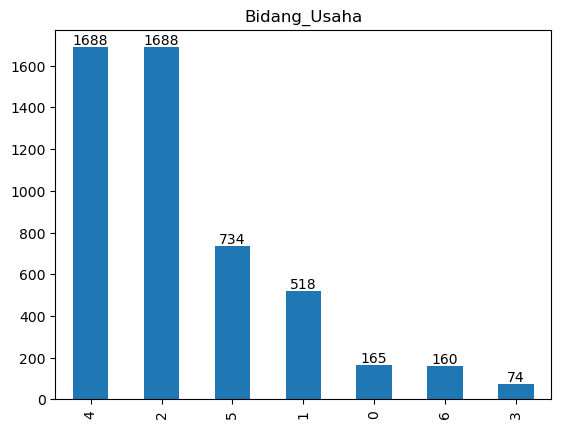

Jenis_Kredit
2    4362
0     551
1     114
Name: Jenis_Kredit, dtype: int64


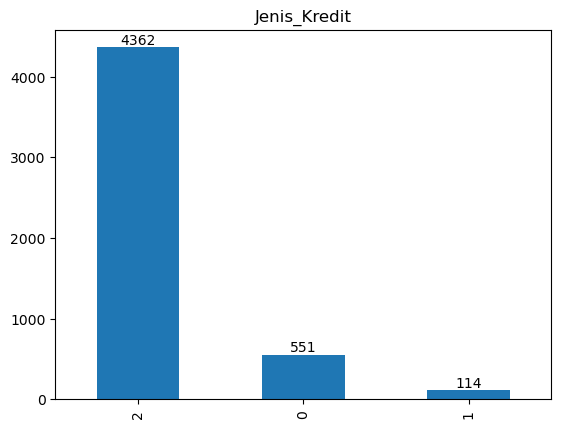

Lama_Kredit
1    1496
0    1416
2     993
3     642
4     480
Name: Lama_Kredit, dtype: int64


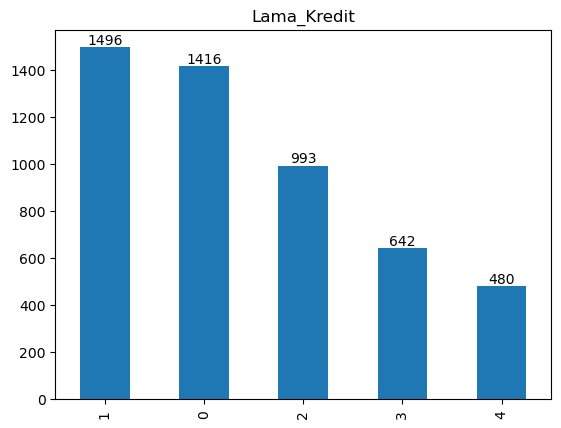

Peruntukan_Kredit
1    4163
0     864
Name: Peruntukan_Kredit, dtype: int64


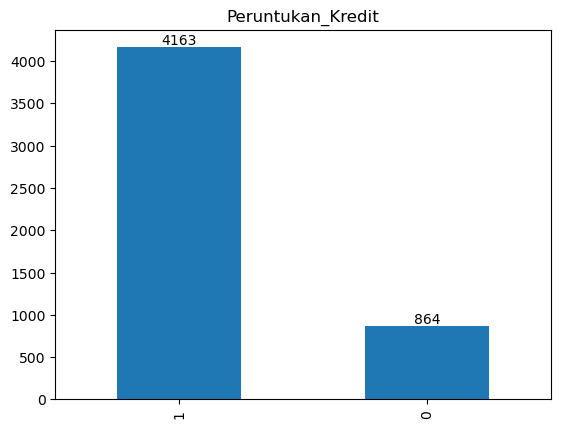

Tersedianya_Cadangan
0    3287
1    1224
2     516
Name: Tersedianya_Cadangan, dtype: int64


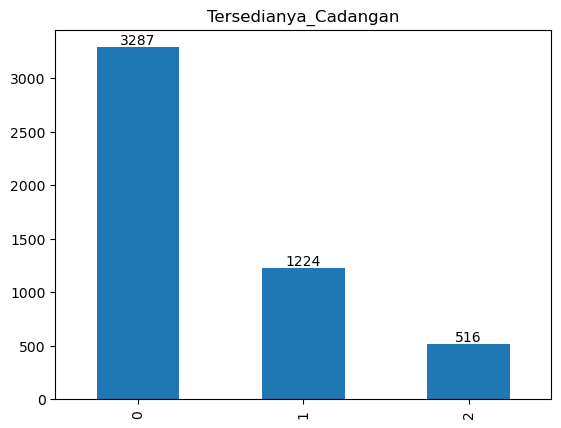

Lokasi_Usaha
3    1889
0    1129
8     550
4     512
1     423
7     237
2     141
5      78
6      68
Name: Lokasi_Usaha, dtype: int64


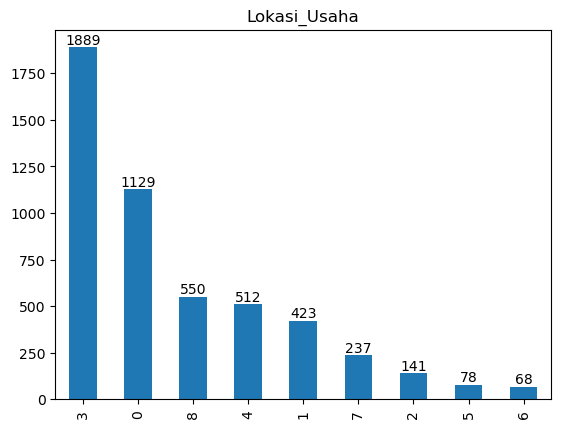

Jenis_Usaha
2    4745
3     203
0      75
4       3
1       1
Name: Jenis_Usaha, dtype: int64


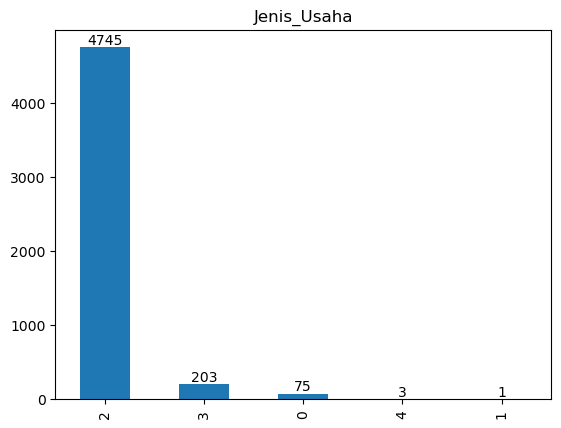

Kollektibility
0    5027
Name: Kollektibility, dtype: int64


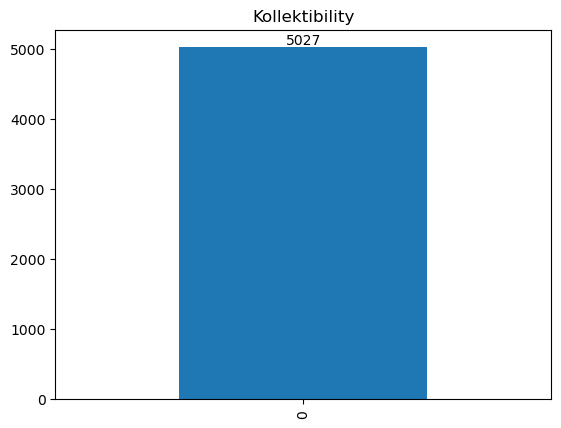

Menerima_Keringanan
0    3962
1    1065
Name: Menerima_Keringanan, dtype: int64


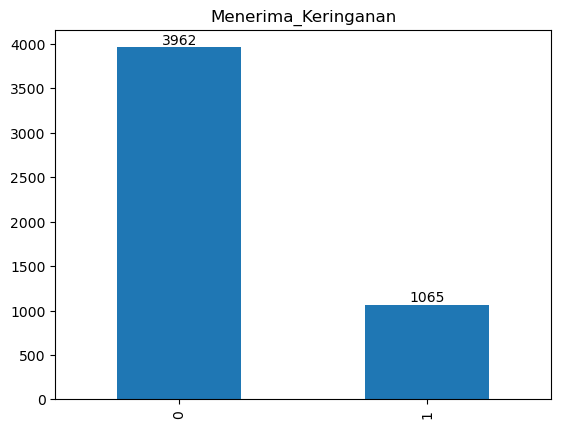

In [ ]:
for column in categorical_columns:
    print(column)
    print(Data_ekspansi[column].value_counts())
    plt.figure()
    #Data_analisis[column].value_counts().sort_index().plot(kind='barh',color='red')
    fig = Data_ekspansi[column].value_counts().plot(kind='bar')
    #fig.set_xticklabels(Data_analisis[column].value_counts())
    plt.bar_label(fig.containers[0], label_type='edge')
    plt.title(column)
    plt.show()

In [ ]:
# for column in categorical_columns:
    print(column)
    print(Kelompok_1[column].value_counts())
    plt.figure()
    Kelompok_1[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

Bidang_Usaha
2    278
4    192
1     95
0     43
3     20
6     13
5      3
Name: Bidang_Usaha, dtype: int64


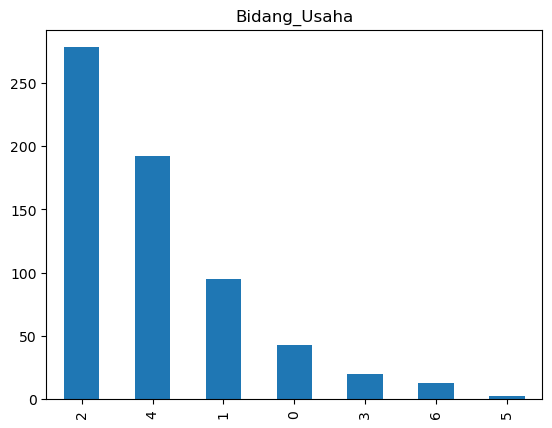

Jenis_Kredit
2    475
0    131
1     38
Name: Jenis_Kredit, dtype: int64


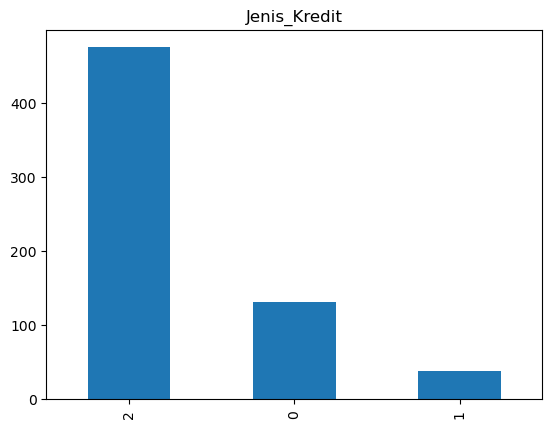

Lama_Kredit
2    326
3    168
4    134
1     16
Name: Lama_Kredit, dtype: int64


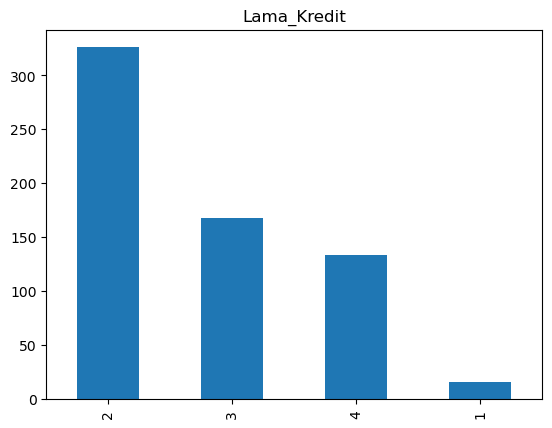

Peruntukan_Kredit
1    447
0    197
Name: Peruntukan_Kredit, dtype: int64


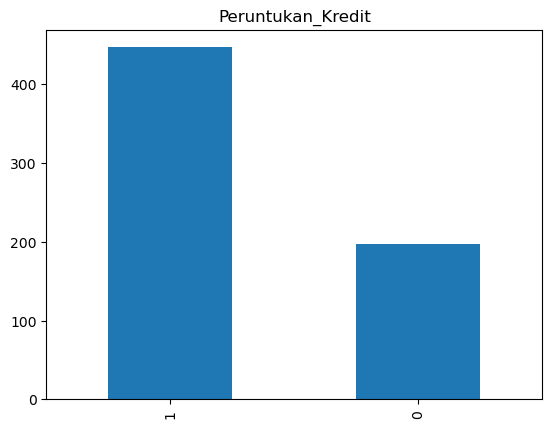

Tersedianya_Cadangan
1    475
2    169
Name: Tersedianya_Cadangan, dtype: int64


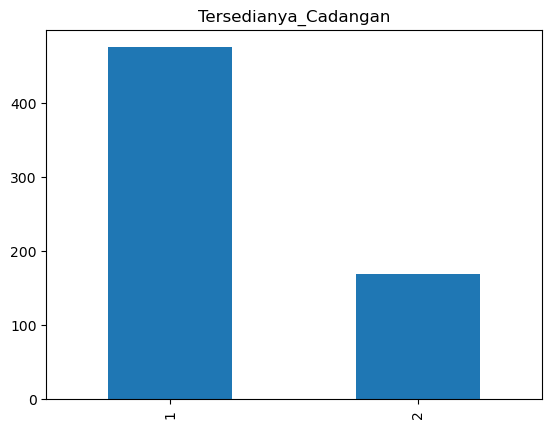

Lokasi_Usaha
3    251
0    187
4     81
8     63
7     25
1     24
2     10
5      2
6      1
Name: Lokasi_Usaha, dtype: int64


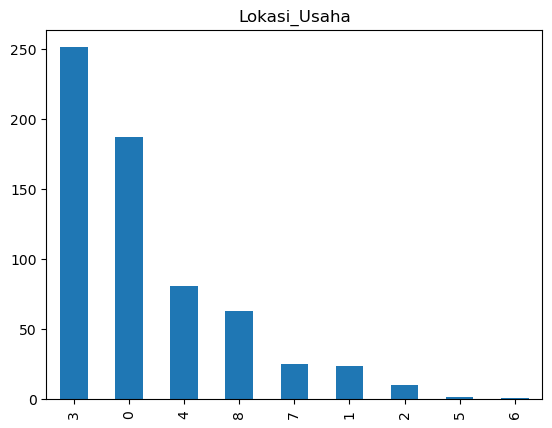

Jenis_Usaha
2    570
3     54
0     18
4      2
Name: Jenis_Usaha, dtype: int64


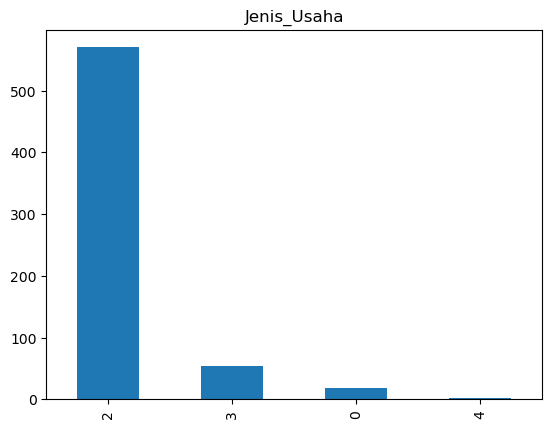

Kollektibility
0    644
Name: Kollektibility, dtype: int64


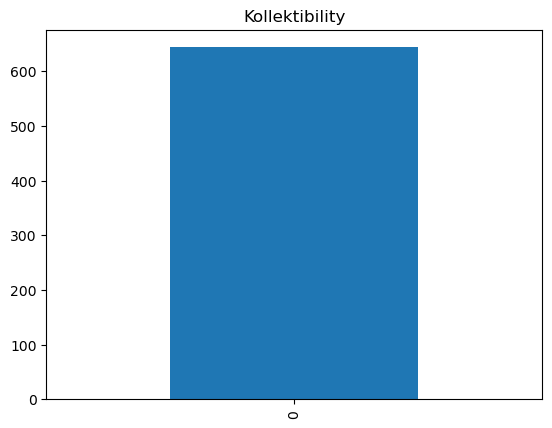

Menerima_Keringanan
1    644
Name: Menerima_Keringanan, dtype: int64


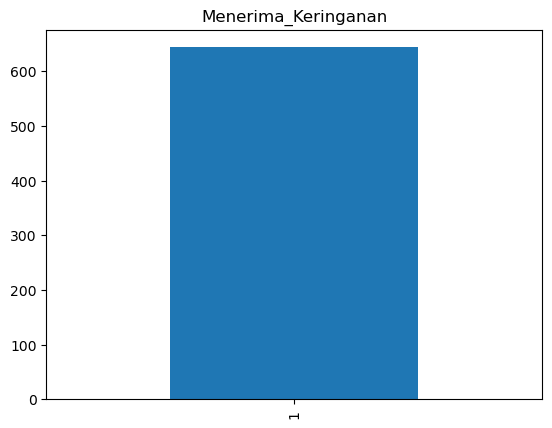

In [ ]:
for column in categorical_columns:
    print(column)
    print(Kelompok_2[column].value_counts())
    plt.figure()
    Kelompok_2[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

Bidang_Usaha
2    181
4    146
1     54
0     19
3     10
6      6
5      5
Name: Bidang_Usaha, dtype: int64


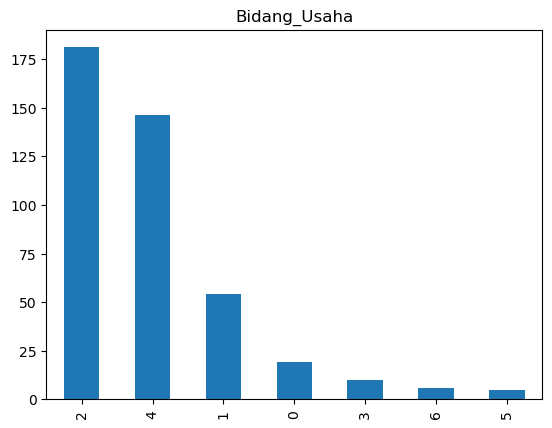

Jenis_Kredit
2    289
0    109
1     23
Name: Jenis_Kredit, dtype: int64


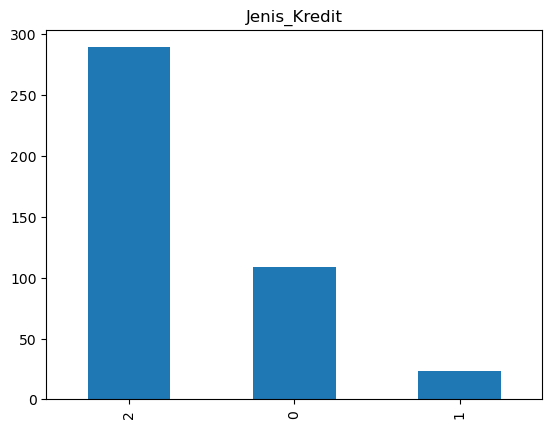

Lama_Kredit
2    175
3    133
4    108
1      4
0      1
Name: Lama_Kredit, dtype: int64


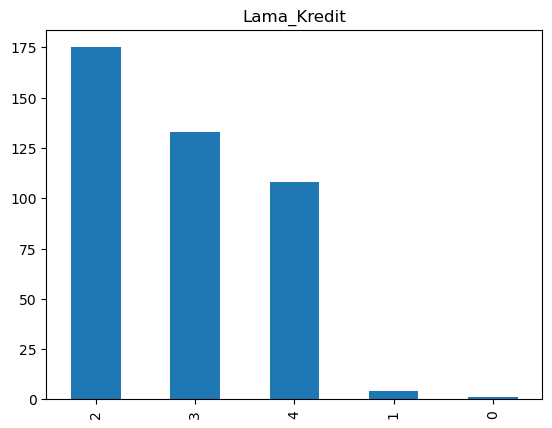

Peruntukan_Kredit
1    301
0    120
Name: Peruntukan_Kredit, dtype: int64


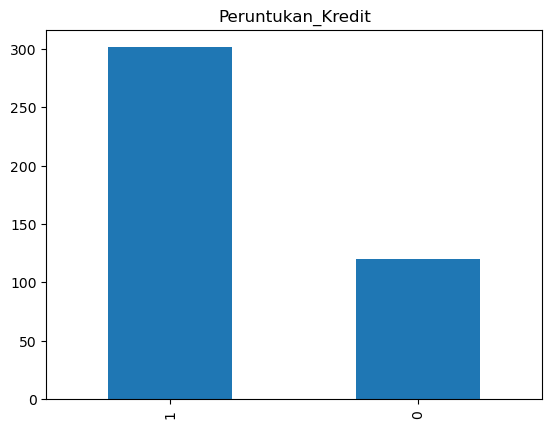

Tersedianya_Cadangan
0    421
Name: Tersedianya_Cadangan, dtype: int64


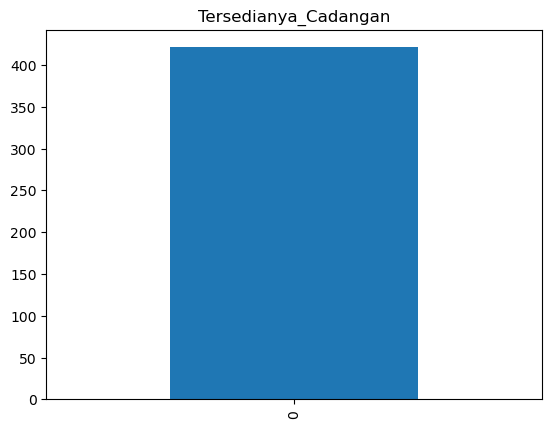

Lokasi_Usaha
3    175
0    116
4     53
8     43
7     13
1     11
2      7
5      2
6      1
Name: Lokasi_Usaha, dtype: int64


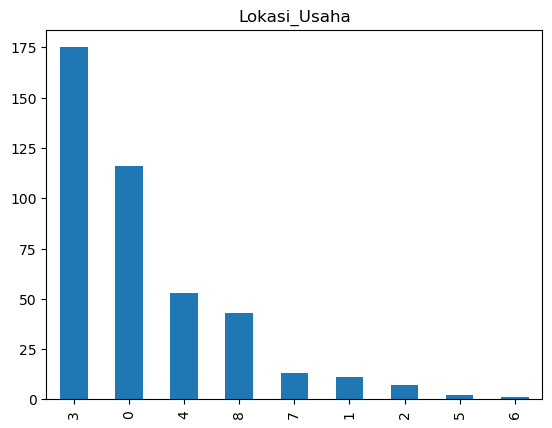

Jenis_Usaha
2    365
3     45
0     11
Name: Jenis_Usaha, dtype: int64


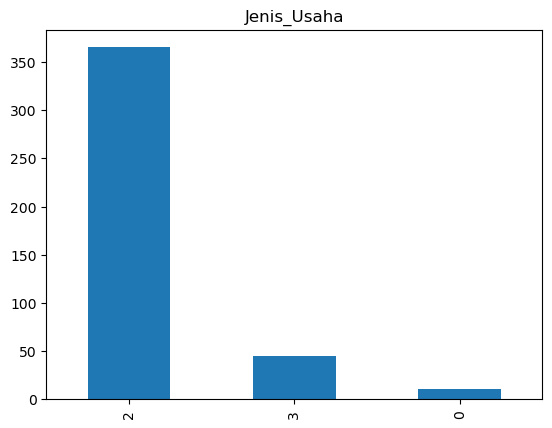

Kollektibility
0    421
Name: Kollektibility, dtype: int64


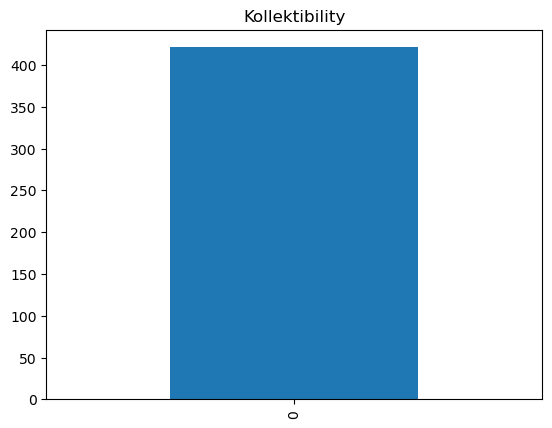

Menerima_Keringanan
1    421
Name: Menerima_Keringanan, dtype: int64


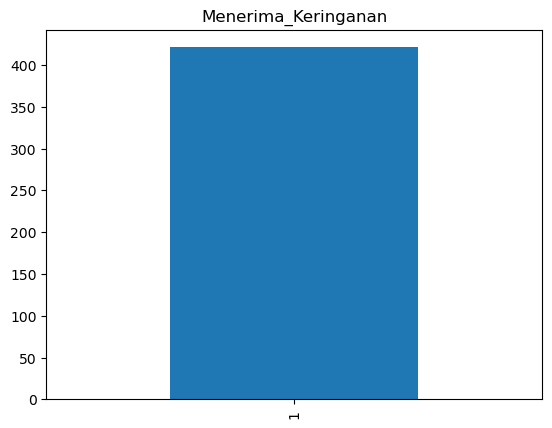

In [ ]:
for column in categorical_columns:
    print(column)
    print(Kelompok_3[column].value_counts())
    plt.figure()
    Kelompok_3[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

Bidang_Usaha
5    105
4     99
2     80
1     28
6     20
0     12
3      3
Name: Bidang_Usaha, dtype: int64


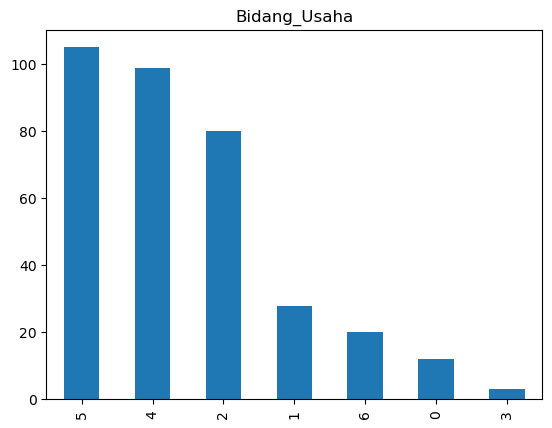

Jenis_Kredit
2    331
1     11
0      5
Name: Jenis_Kredit, dtype: int64


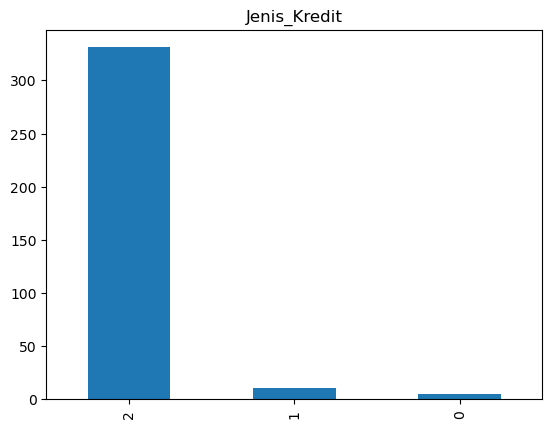

Lama_Kredit
1    201
0     63
2     51
4     18
3     14
Name: Lama_Kredit, dtype: int64


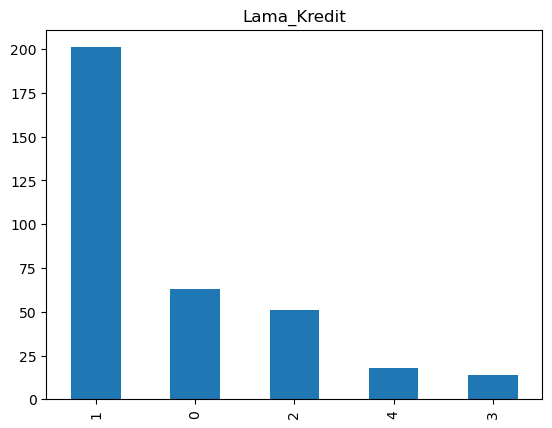

Peruntukan_Kredit
1    339
0      8
Name: Peruntukan_Kredit, dtype: int64


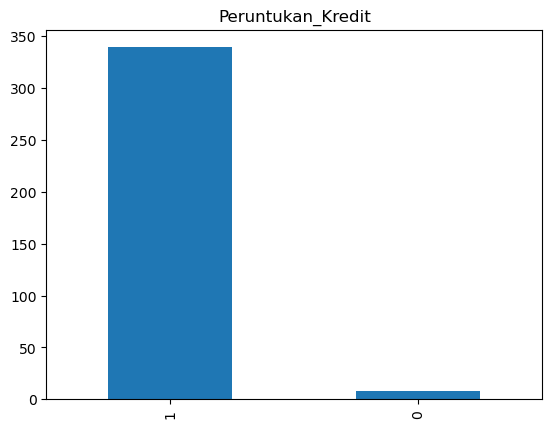

Tersedianya_Cadangan
2    347
Name: Tersedianya_Cadangan, dtype: int64


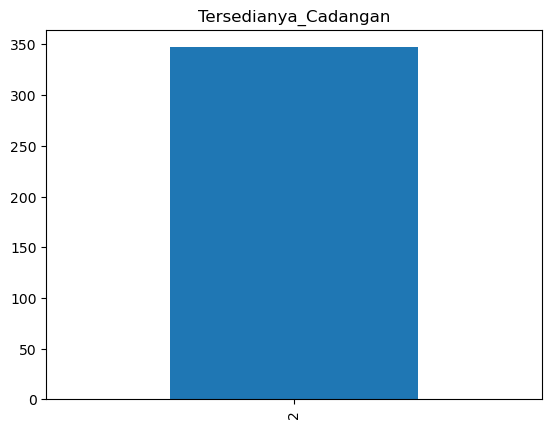

Lokasi_Usaha
3    102
7     66
0     42
4     38
1     37
8     32
2     28
6      1
5      1
Name: Lokasi_Usaha, dtype: int64


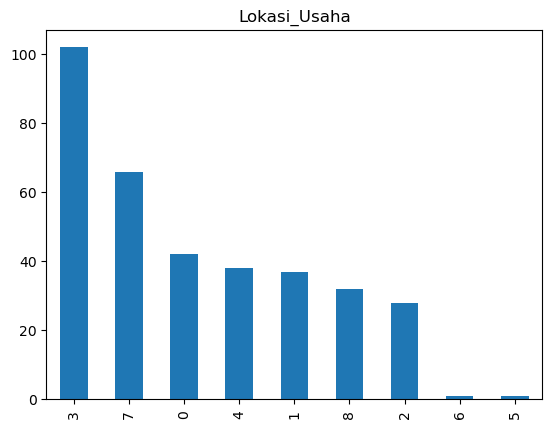

Jenis_Usaha
2    346
0      1
Name: Jenis_Usaha, dtype: int64


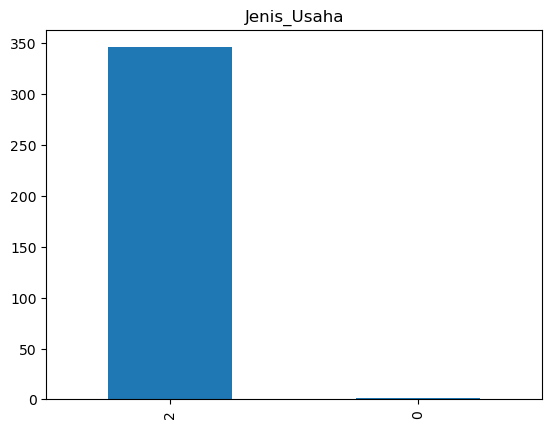

Kollektibility
0    347
Name: Kollektibility, dtype: int64


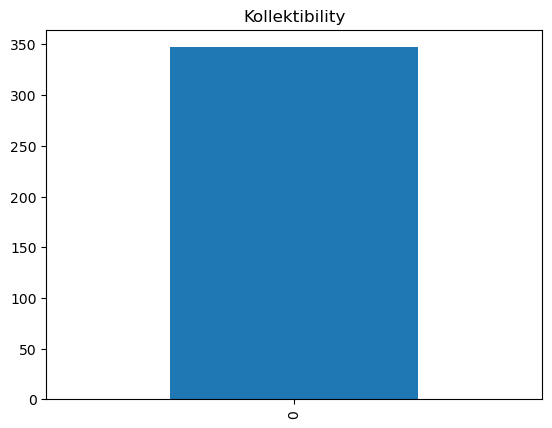

Menerima_Keringanan
0    347
Name: Menerima_Keringanan, dtype: int64


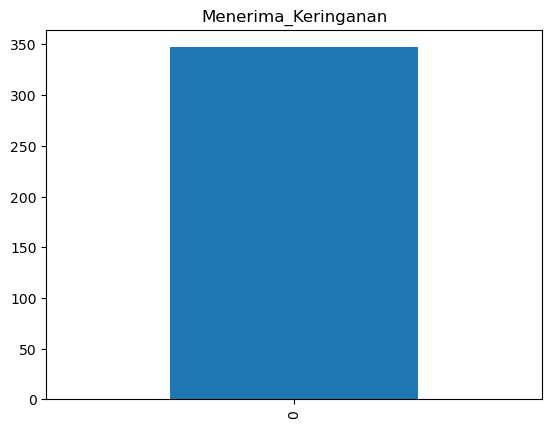

In [ ]:
for column in categorical_columns:
    print(column)
    print(Kelompok_4[column].value_counts())
    plt.figure()
    Kelompok_4[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

Bidang_Usaha
4    977
2    905
5    571
1    244
6     76
0     61
3     32
Name: Bidang_Usaha, dtype: int64


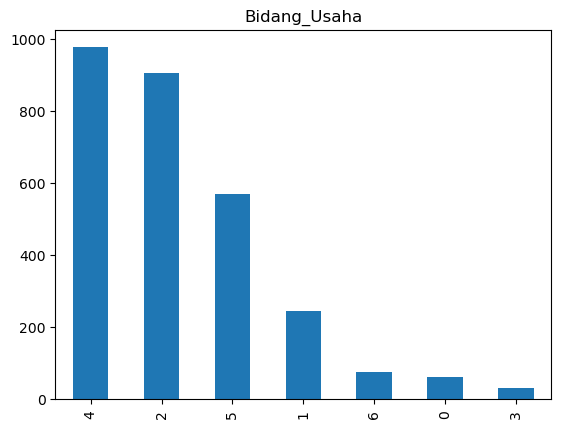

Jenis_Kredit
2    2568
0     271
1      27
Name: Jenis_Kredit, dtype: int64


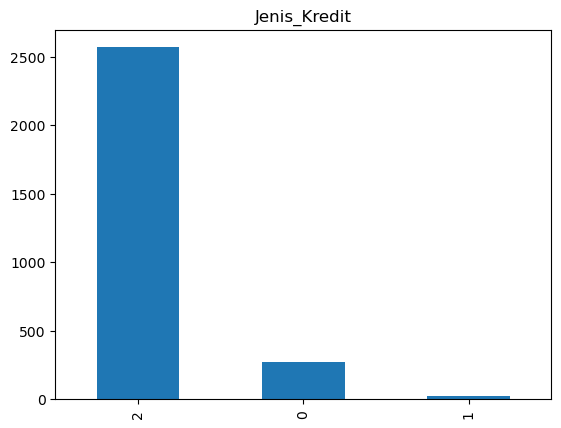

Lama_Kredit
0    1148
1    1025
2     283
3     243
4     167
Name: Lama_Kredit, dtype: int64


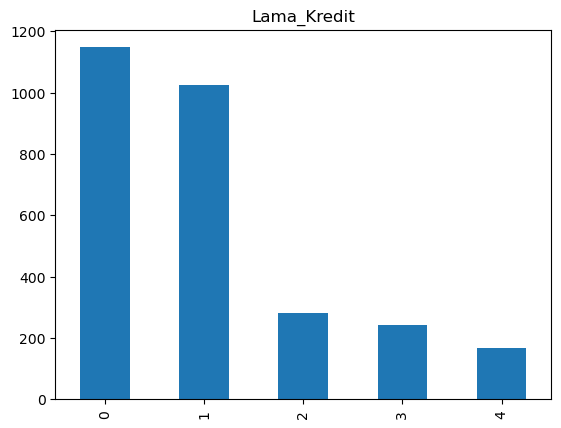

Peruntukan_Kredit
1    2390
0     476
Name: Peruntukan_Kredit, dtype: int64


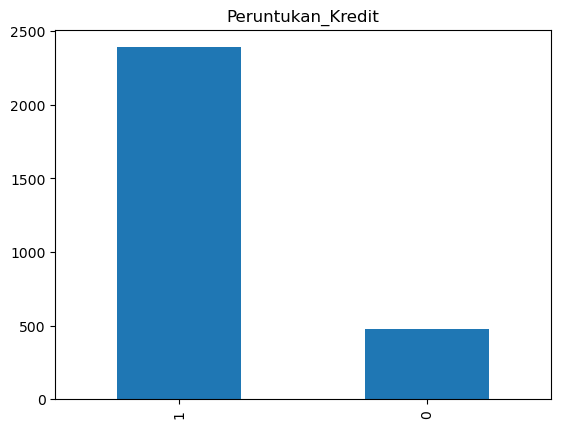

Tersedianya_Cadangan
0    2866
Name: Tersedianya_Cadangan, dtype: int64


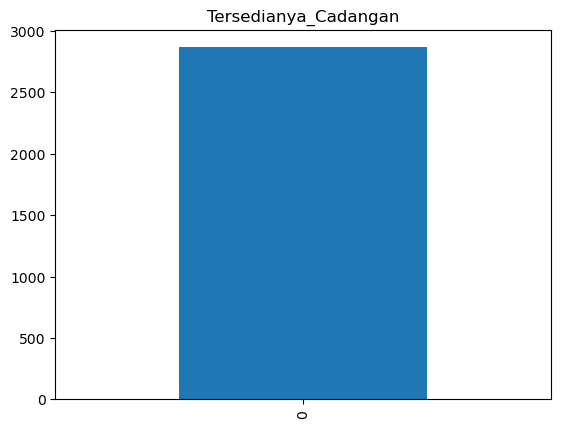

Lokasi_Usaha
3    1069
0     612
8     350
4     261
1     249
7     118
2      83
5      66
6      58
Name: Lokasi_Usaha, dtype: int64


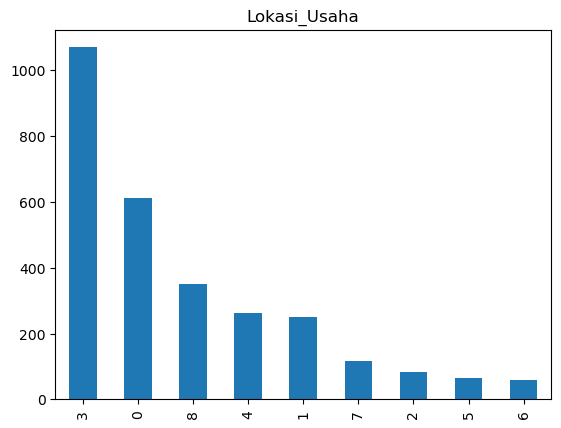

Jenis_Usaha
2    2737
3      87
0      40
4       1
1       1
Name: Jenis_Usaha, dtype: int64


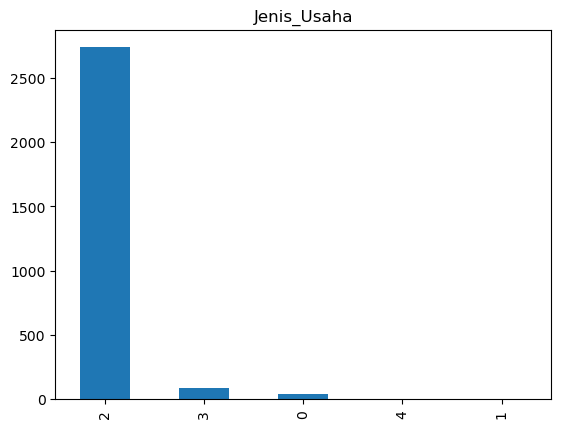

Kollektibility
0    2866
Name: Kollektibility, dtype: int64


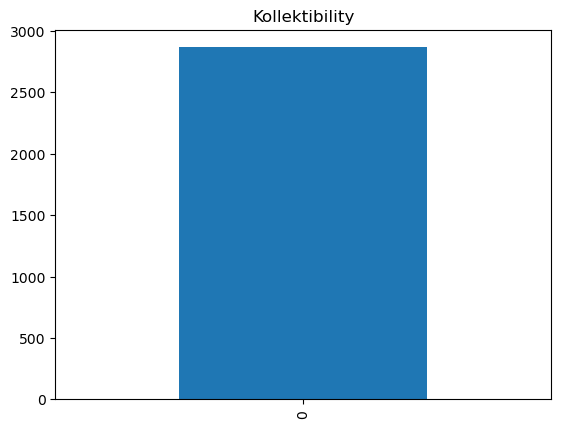

Menerima_Keringanan
0    2866
Name: Menerima_Keringanan, dtype: int64


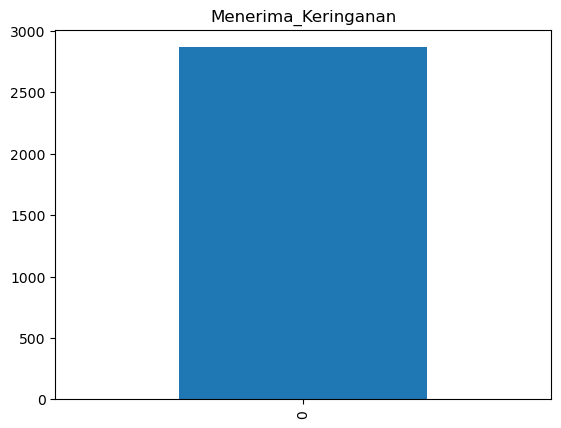

In [ ]:
for column in categorical_columns:
    print(column)
    print(Kelompok_5[column].value_counts())
    plt.figure()
    Kelompok_5[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

In [ ]:
#Data_analisis["Bidang_Usaha"]=Data_analisis["Bidang_Usaha"].replace({'0':'Hotel dan Restaurant','1':'Industri Pengolahan','2':'Jasa dan Akomodasi Lainnya','3':'Lainnya','4': 'Perdangangan','5':'Pertanian dan Perkebunan','6':'Peternakan'})
#Data_analisis["Lokasi_Usaha"]=Data_analisis["Lokasi_Usaha"].replace({'0':'Badung','1':'Bangli','2':'Buleleng','3':'Denpasar','4': 'Gianyar','5':'Jembrana','6':'Karangasem','7':'Klungkung','8':'Tabanan'})
#Data_analisis["Jenis_Kredit"]=Data_analisis["Jenis_Kredit"].replace({'0':'BCM - Reguler Produktif','1':'BWU - Wirausaha','2':'KUR - Program Pemerintah'})
#Data_analisis["Lama_Kredit"]=Data_analisis["Lama_Kredit"].replace({'0':'0-1 Tahun','1':'1-2 Tahun','2':'2-3 Tahun','3':'3-4 Tahun','4': '>4 Tahun'})
#Data_analisis["Peruntukan_Kredit"]=Data_analisis["Peruntukan_Kredit"].replace({'0':'Kredit Investasi','1':'Kredit Modal Kerja'})
#Data_analisis["Tersedianya_Cadangan"]=Data_analisis["Tersedianya_Cadangan"].replace({'0':'Ada','1':'Kurang','2':'Tidak Ada'})
#Data_analisis["Jenis_Usaha"]=Data_analisis["Jenis_Usaha"].replace({'0':'CV','1':'Lain-lain','2':'Perorangan','3':'PT','4': 'Yayasan dan Koperasi'})
#Data_analisis["Kollektibility"]=Data_analisis["Kollektibility"].replace({'0':'1','1':'2','2':'3','3':'4','4': '5'})
#Data_analisis["Menerima_Keringanan"]=Data_analisis["Menerima_Keringanan"].replace({'0':'Ya','1':'Tidak'})

# Analisis profil klaster mitigasi risiko

In [ ]:
Data= pd.read_excel(r'C:\Users\DELL\Documents\Personal\educativa\Project 2849\Rev 0\Data.xlsx')
condition1 = Data["Kollektibility"] == 1
condition2 = Data["Kollektibility"] == 2
condition3 = Data["Kollektibility"] == 3
condition4 = Data["Kollektibility"] == 4
Data_mitigasi=Data[condition1 | condition2 | condition3 | condition4]
Data_mitigasi=Data_mitigasi.reset_index(drop=True)
Data_mitigasi = Data_mitigasi.astype(str)
categorical_columns = Data_mitigasi.select_dtypes(include=['object', 'category']).columns
Data_mitigasi["Anggota"]=Anggota_mitigasi
Kelompok_1=Data_mitigasi[Data_mitigasi["Anggota"] == 1]
Kelompok_2=Data_mitigasi[Data_mitigasi["Anggota"] == 2]
Kelompok_3=Data_mitigasi[Data_mitigasi["Anggota"] == 3]

Bidang_Usaha
4    27
5    19
2    10
1     3
3     2
Name: Bidang_Usaha, dtype: int64


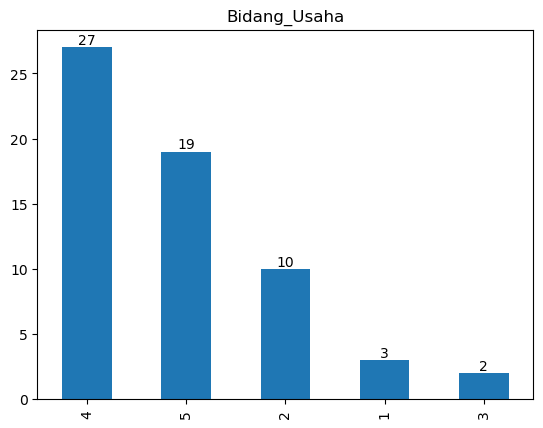

Jenis_Kredit
2    40
0    18
1     3
Name: Jenis_Kredit, dtype: int64


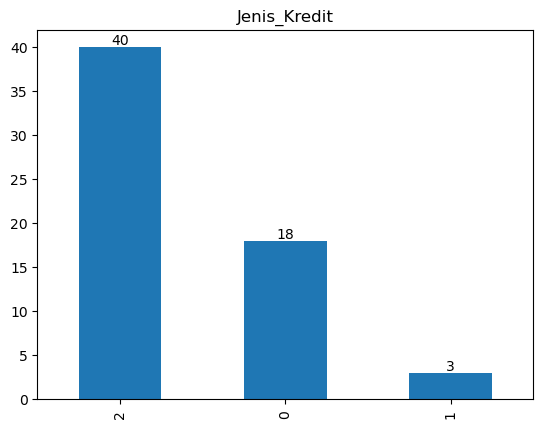

Lama_Kredit
2    26
4    15
1    13
3     7
Name: Lama_Kredit, dtype: int64


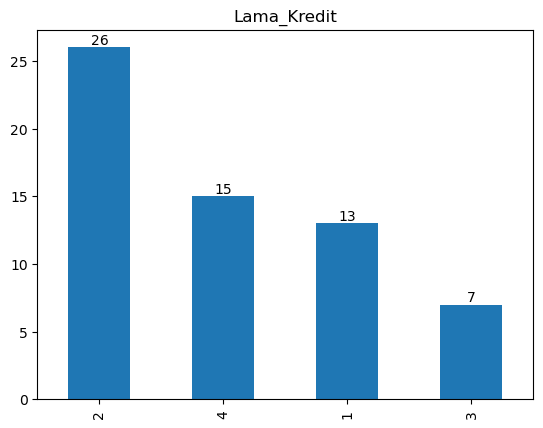

Peruntukan_Kredit
1    55
0     6
Name: Peruntukan_Kredit, dtype: int64


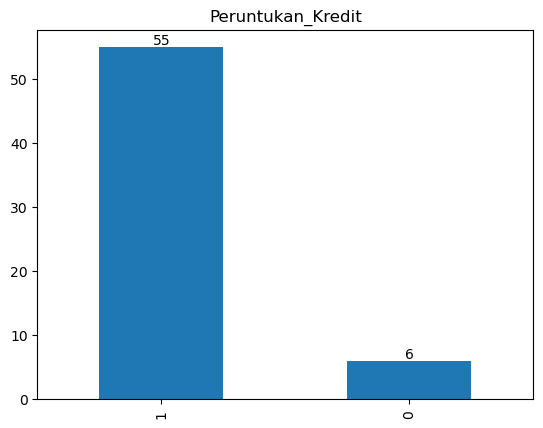

Tersedianya_Cadangan
2    59
0     2
Name: Tersedianya_Cadangan, dtype: int64


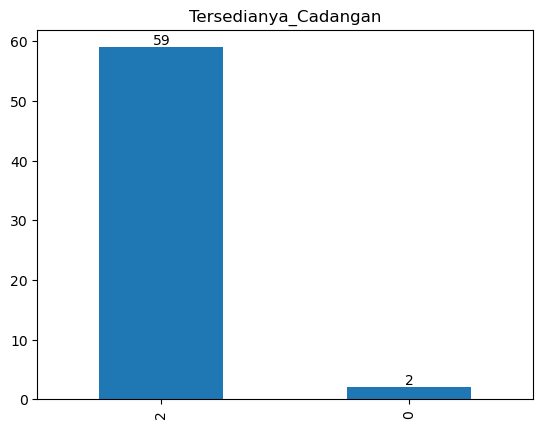

Lokasi_Usaha
3    16
8    14
0    13
1     7
4     5
5     3
2     2
7     1
Name: Lokasi_Usaha, dtype: int64


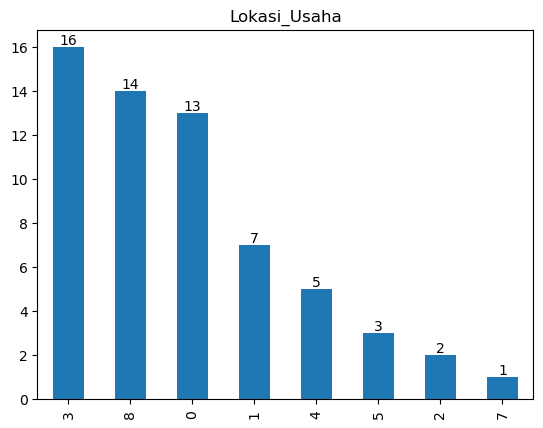

Jenis_Usaha
2    50
0     7
3     4
Name: Jenis_Usaha, dtype: int64


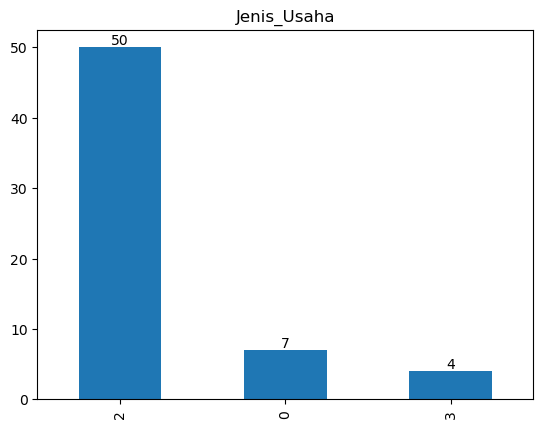

Kollektibility
1    43
4    10
3     5
2     3
Name: Kollektibility, dtype: int64


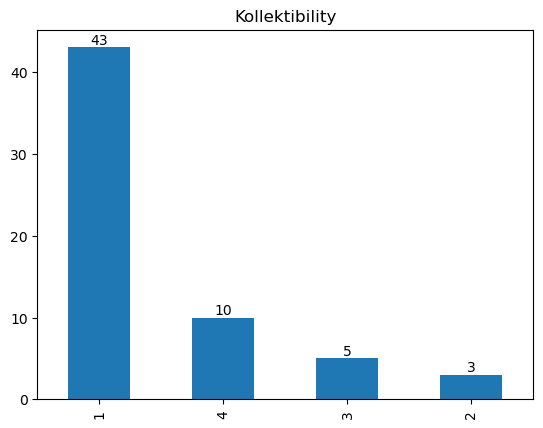

Menerima_Keringanan
1    31
0    30
Name: Menerima_Keringanan, dtype: int64


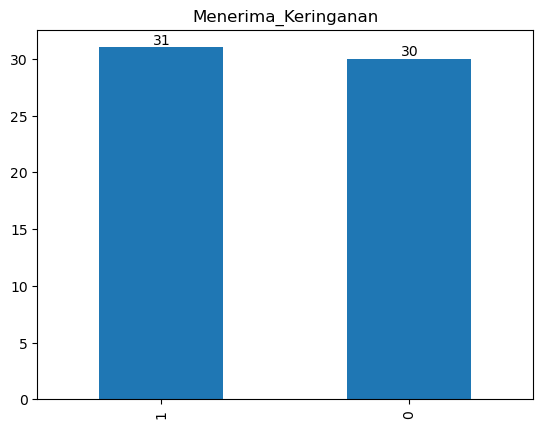

In [ ]:
for column in categorical_columns:
    print(column)
    print(Data_mitigasi[column].value_counts())
    plt.figure()
    #Data_analisis[column].value_counts().sort_index().plot(kind='barh',color='red')
    fig = Data_mitigasi[column].value_counts().plot(kind='bar')
    #fig.set_xticklabels(Data_analisis[column].value_counts())
    plt.bar_label(fig.containers[0], label_type='edge')
    plt.title(column)
    plt.show()

Bidang_Usaha
4    9
2    3
1    2
3    1
Name: Bidang_Usaha, dtype: int64


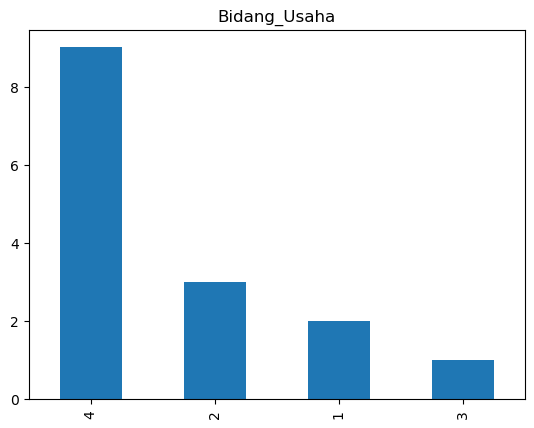

Jenis_Kredit
0    10
2     3
1     2
Name: Jenis_Kredit, dtype: int64


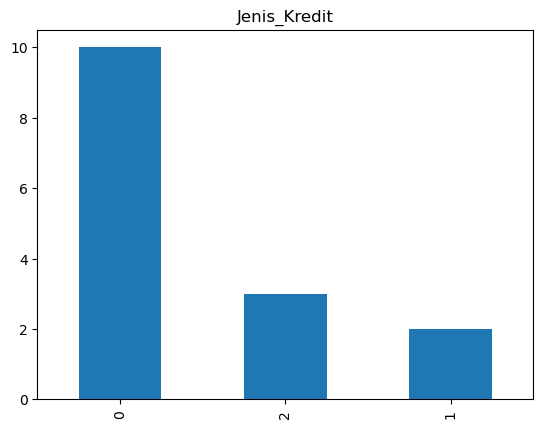

Lama_Kredit
4    7
1    4
3    3
2    1
Name: Lama_Kredit, dtype: int64


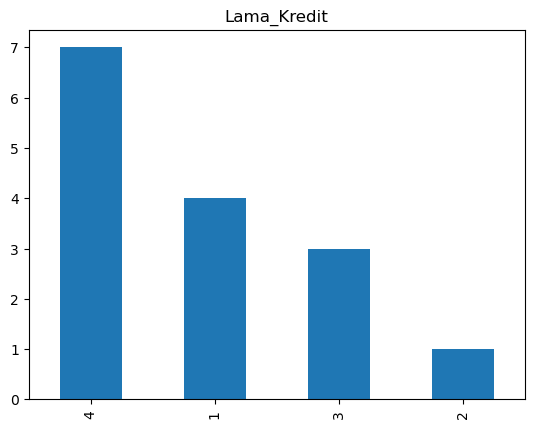

Peruntukan_Kredit
1    14
0     1
Name: Peruntukan_Kredit, dtype: int64


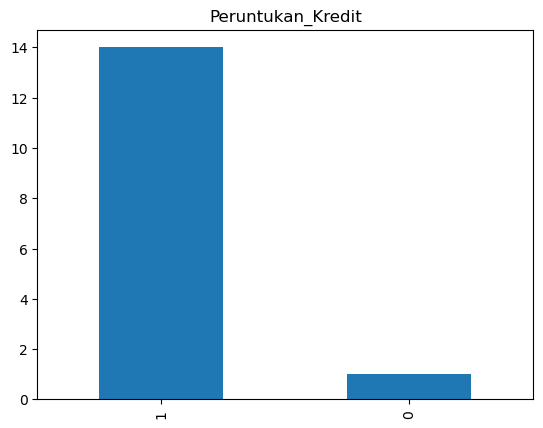

Tersedianya_Cadangan
2    14
0     1
Name: Tersedianya_Cadangan, dtype: int64


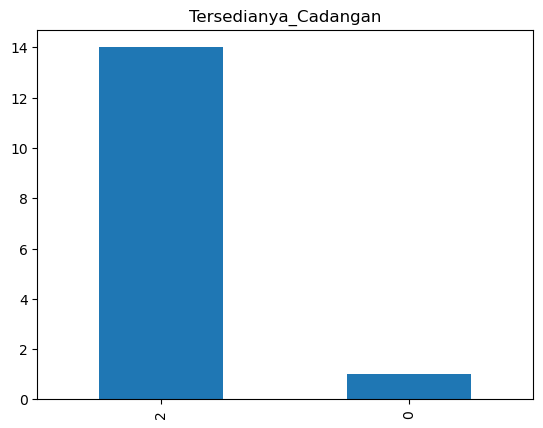

Lokasi_Usaha
3    5
0    5
1    3
8    1
5    1
Name: Lokasi_Usaha, dtype: int64


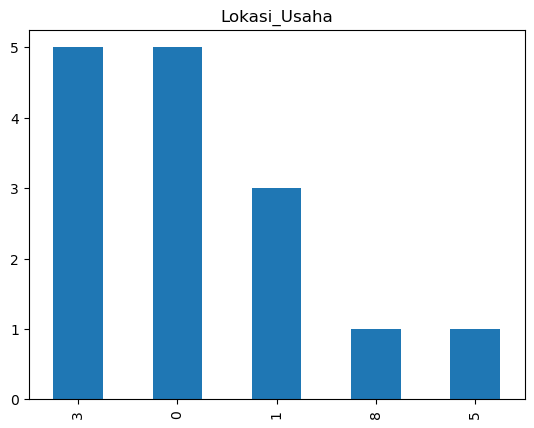

Jenis_Usaha
2    11
0     3
3     1
Name: Jenis_Usaha, dtype: int64


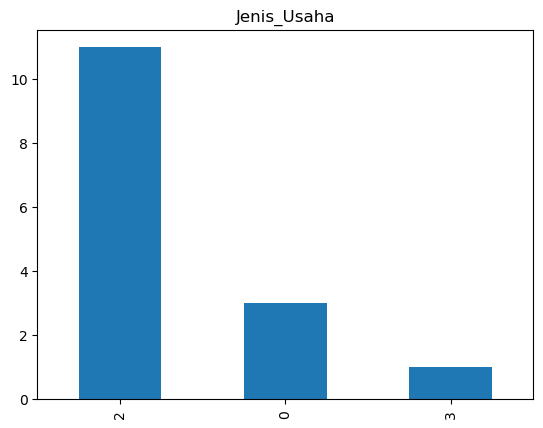

Kollektibility
4    10
3     5
Name: Kollektibility, dtype: int64


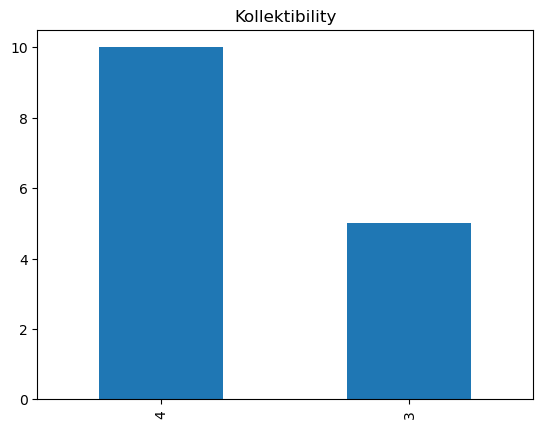

Menerima_Keringanan
1    12
0     3
Name: Menerima_Keringanan, dtype: int64


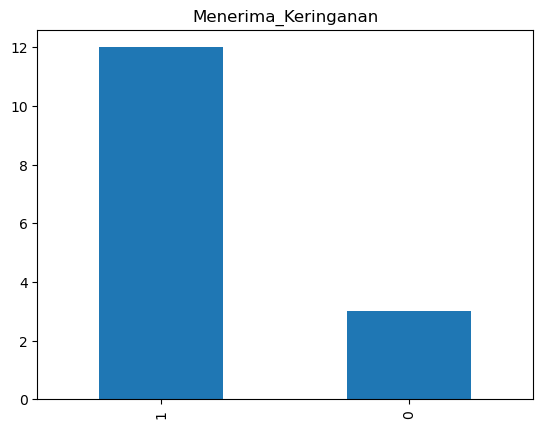

In [ ]:
for column in categorical_columns:
    print(column)
    print(Kelompok_1[column].value_counts())
    plt.figure()
    Kelompok_1[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

Bidang_Usaha
4    10
2     6
3     1
1     1
5     1
Name: Bidang_Usaha, dtype: int64


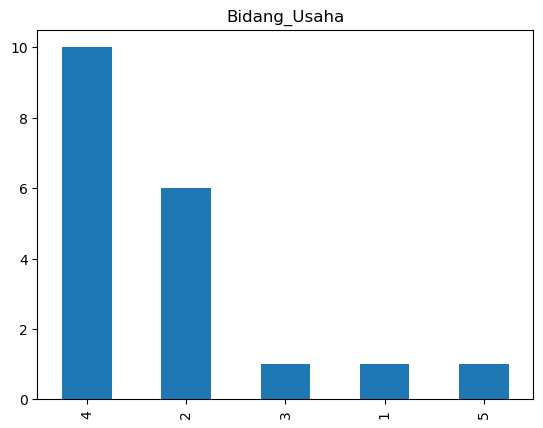

Jenis_Kredit
2    10
0     8
1     1
Name: Jenis_Kredit, dtype: int64


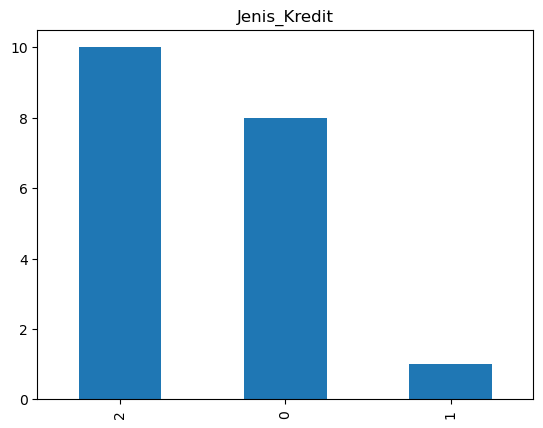

Lama_Kredit
4    8
2    6
3    4
1    1
Name: Lama_Kredit, dtype: int64


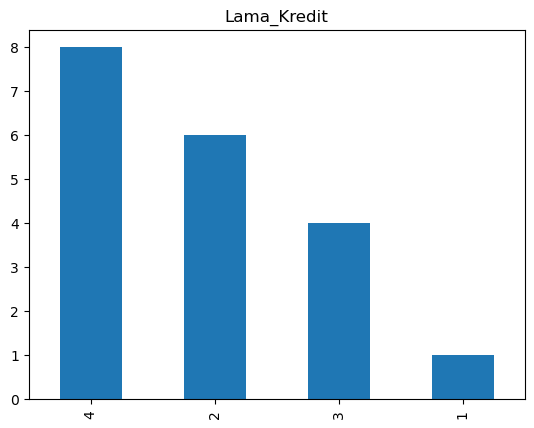

Peruntukan_Kredit
1    14
0     5
Name: Peruntukan_Kredit, dtype: int64


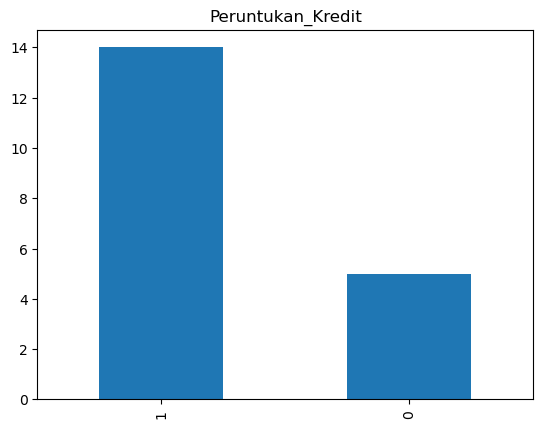

Tersedianya_Cadangan
2    19
Name: Tersedianya_Cadangan, dtype: int64


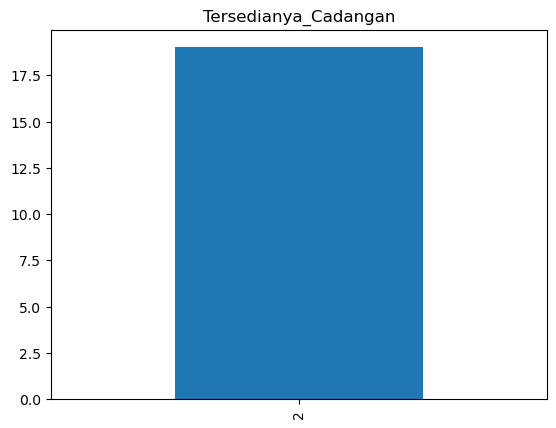

Lokasi_Usaha
3    7
0    5
1    4
4    2
7    1
Name: Lokasi_Usaha, dtype: int64


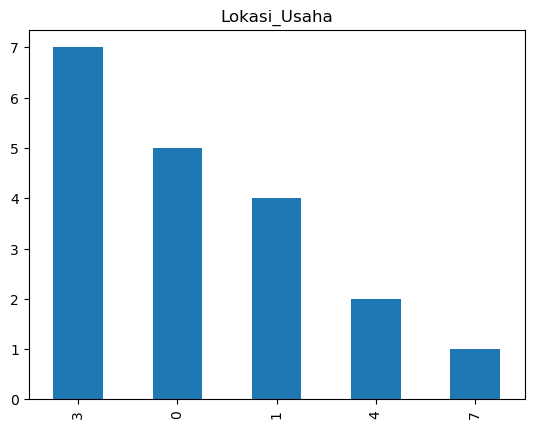

Jenis_Usaha
2    12
0     4
3     3
Name: Jenis_Usaha, dtype: int64


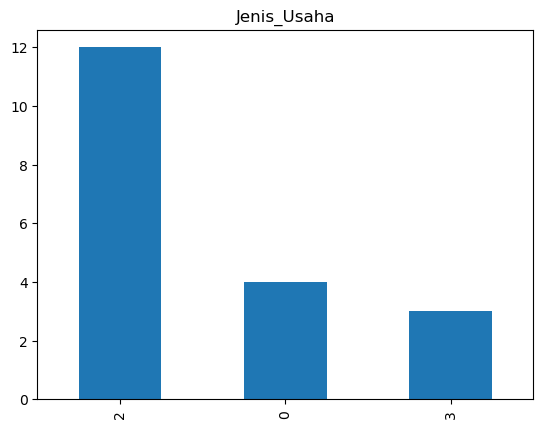

Kollektibility
1    16
2     3
Name: Kollektibility, dtype: int64


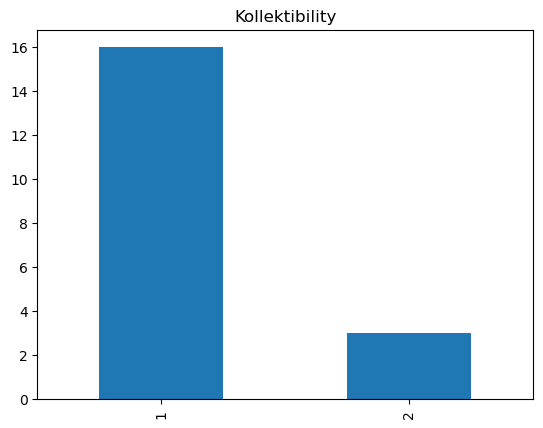

Menerima_Keringanan
1    19
Name: Menerima_Keringanan, dtype: int64


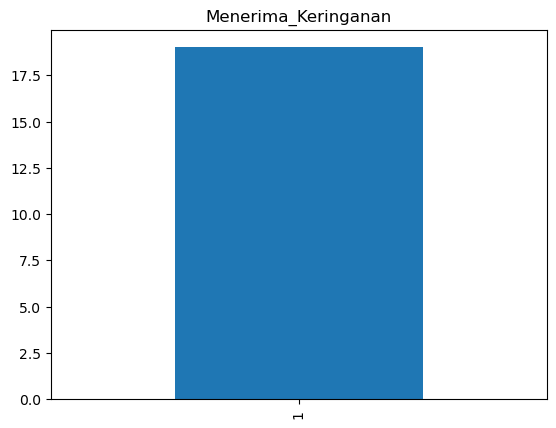

In [ ]:
for column in categorical_columns:
    print(column)
    print(Kelompok_2[column].value_counts())
    plt.figure()
    Kelompok_2[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

Bidang_Usaha
5    18
4     8
2     1
Name: Bidang_Usaha, dtype: int64


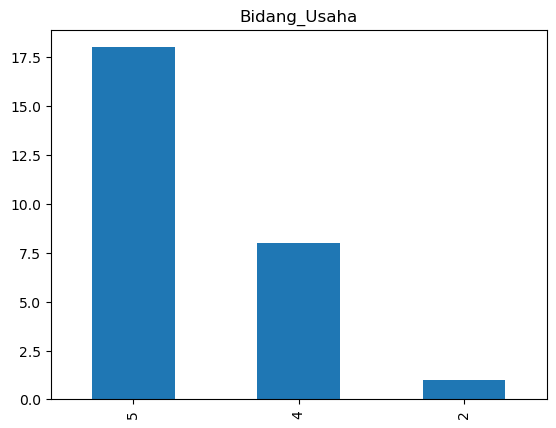

Jenis_Kredit
2    27
Name: Jenis_Kredit, dtype: int64


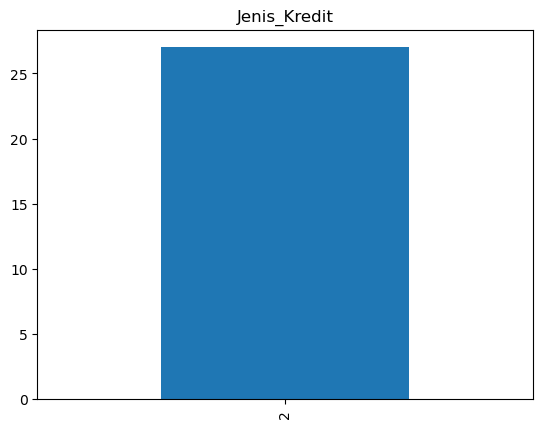

Lama_Kredit
2    19
1     8
Name: Lama_Kredit, dtype: int64


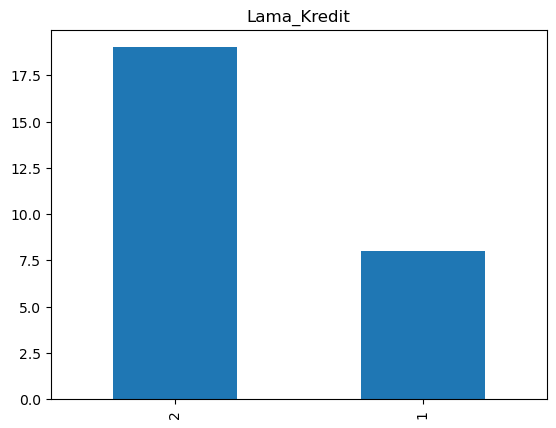

Peruntukan_Kredit
1    27
Name: Peruntukan_Kredit, dtype: int64


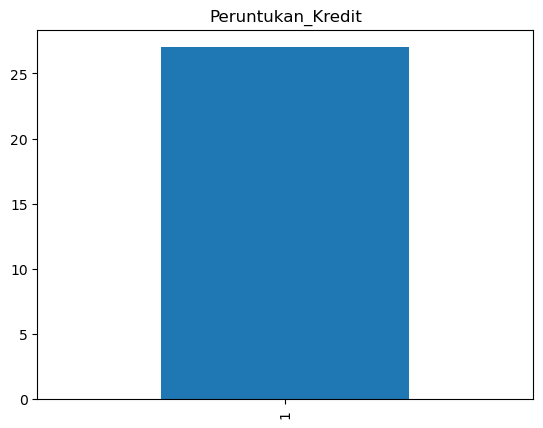

Tersedianya_Cadangan
2    26
0     1
Name: Tersedianya_Cadangan, dtype: int64


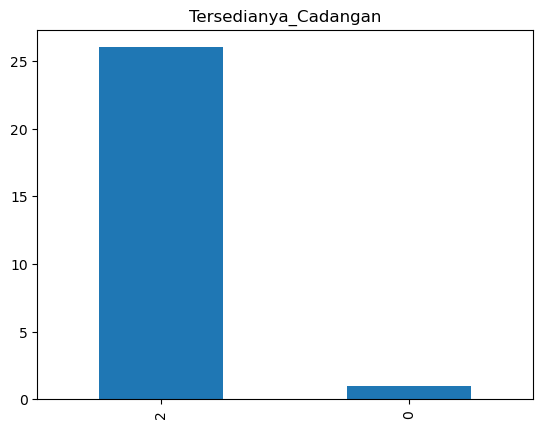

Lokasi_Usaha
8    13
3     4
4     3
0     3
5     2
2     2
Name: Lokasi_Usaha, dtype: int64


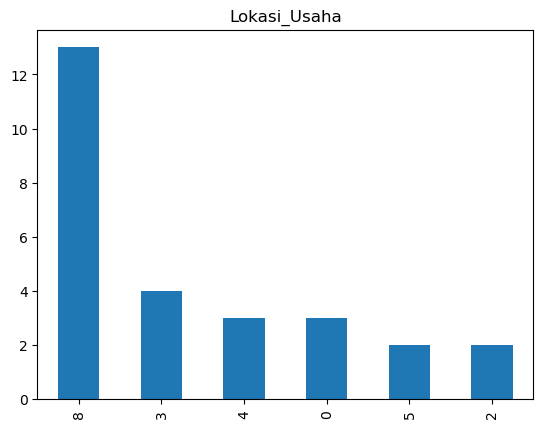

Jenis_Usaha
2    27
Name: Jenis_Usaha, dtype: int64


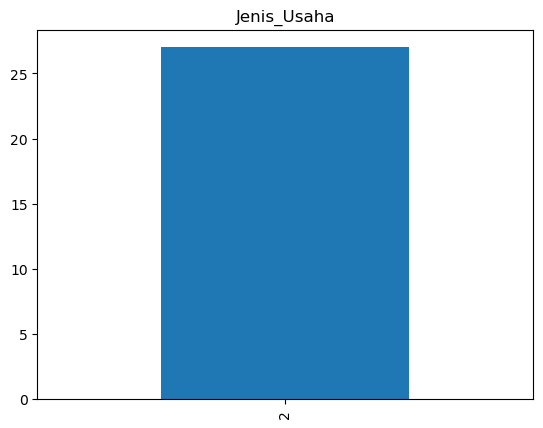

Kollektibility
1    27
Name: Kollektibility, dtype: int64


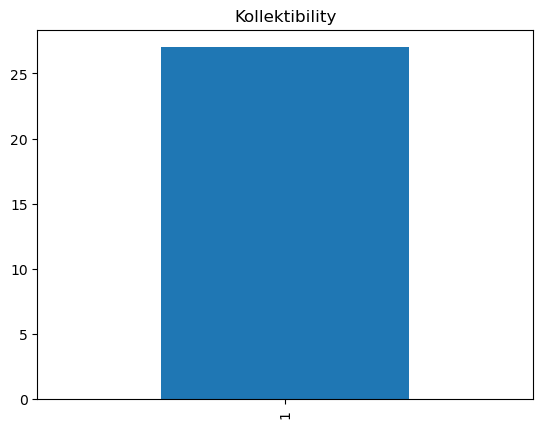

Menerima_Keringanan
0    27
Name: Menerima_Keringanan, dtype: int64


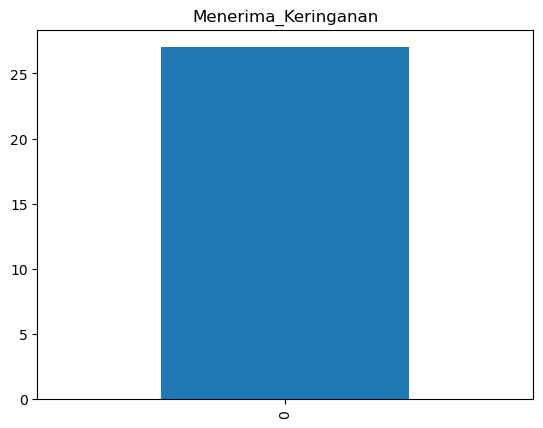

In [ ]:
for column in categorical_columns:
    print(column)
    print(Kelompok_3[column].value_counts())
    plt.figure()
    Kelompok_3[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()